In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelBinarizer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix
import pickle



# 1.Data import

In [ ]:
import sklearn
print(sklearn.__version__)


1.3.2


In [ ]:
df= pd.read_excel("House_Rent_Train.xlsx")


In [ ]:
#head
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [ ]:
#tail
df.tail()

In [ ]:
#sanity check


In [ ]:
df.shape

In [ ]:
df.info()

# 2. Data Cleaning

In [ ]:
#finding missing value
#NA, na , Nan , nan, NULL , null are recognized as missing values by pandas .
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [ ]:
#finding missing values in percentage
#if percentage of missing values is more than 50 percentage we can think of deleting
df.isnull().sum()/df.shape[0]*100

id                 0.000000
type               0.131355
locality           0.778399
activation_date    0.111895
latitude           0.111895
longitude          0.111895
lease_type         0.111895
gym                0.000000
lift               0.000000
swimming_pool      0.000000
negotiable         0.000000
furnishing         0.000000
parking            0.000000
property_size      0.000000
property_age       0.111895
bathroom           0.111895
facing             0.111895
cup_board          0.111895
floor              0.111895
total_floor        0.111895
amenities          0.111895
water_supply       0.111895
building_type      0.111895
balconies          0.111895
rent               0.111895
dtype: float64

In [ ]:
#finding duplicates

df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
20550    False
20551    False
20552    False
20553    False
20554    False
Length: 20555, dtype: bool

In [ ]:
#identifying garbage value
#It will always be in object data type
#If there is garbage value we need to do imputation

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

ff8081815b48bfdd015b4d0e6e720dde    3
ff80818159ded60e0159dfff948e5bcb    3
ff8081815c271c21015c2f09c6603447    3
ff8081815f62b315015f62bc4d96059d    3
ff8081815e73c2e2015e74ac10e91975    3
                                   ..
ff80818161a712160161a719ed350266    1
ff8081815a6f4a9b015a6f577f7405ac    1
ff8081815d26bd9a015d27704e845dbc    1
ff8081815e85428b015e89de3b217da0    1
23                                  1
Name: id, Length: 20523, dtype: int64
******************************
BHK2        11678
BHK3         4388
BHK1         3613
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64
******************************
Whitefield                                                                                        903
HSR Layout                                                                                        682
Banashankari                                                                               

# 3. Exploratory data analysis

In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,20532.0,12.945748,0.029601,12.900004,12.918176,12.943790,12.970979,12.999999
longitude,20532.0,77.637295,0.110525,77.500072,77.572068,77.633506,77.695723,80.266346
gym,20555.0,0.227049,0.418935,0.000000,0.000000,0.000000,0.000000,1.000000
lift,20555.0,0.362053,0.480606,0.000000,0.000000,0.000000,1.000000,1.000000
swimming_pool,20555.0,0.174848,0.379846,0.000000,0.000000,0.000000,0.000000,1.000000
negotiable,20555.0,0.711603,0.453028,0.000000,0.000000,1.000000,1.000000,1.000000
property_size,20555.0,1062.017465,591.207446,1.000000,700.000000,1047.000000,1285.000000,50000.000000
property_age,20532.0,5.769920,6.350989,-1.000000,1.000000,5.000000,10.000000,400.000000
bathroom,20532.0,1.858465,0.710926,1.000000,1.000000,2.000000,2.000000,21.000000
cup_board,20532.0,4.549922,335.154787,0.000000,1.000000,2.000000,3.000000,48026.000000


In [ ]:
df.describe(include="object")

,id,type,locality,activation_date,lease_type,furnishing,parking,facing,amenities,water_supply,building_type
count,20555,20528,20395,20532,20532,20555,20555,20532,20532,20532,20532
unique,20523,9,1917,19566,4,3,4,8,4994,3,4
top,ff8081815b48bfdd015b4d0e6e720dde,BHK2,Whitefield,2017-04-11 18:11:00,FAMILY,SEMI_FURNISHED,BOTH,E,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF
freq,3,11678,903,4,10190,17950,10841,9534,2161,10709,9240


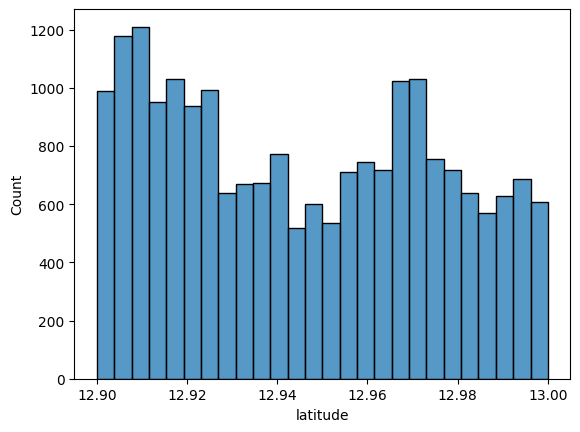

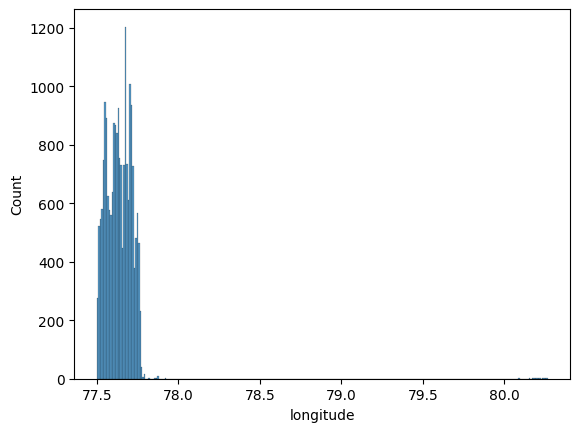

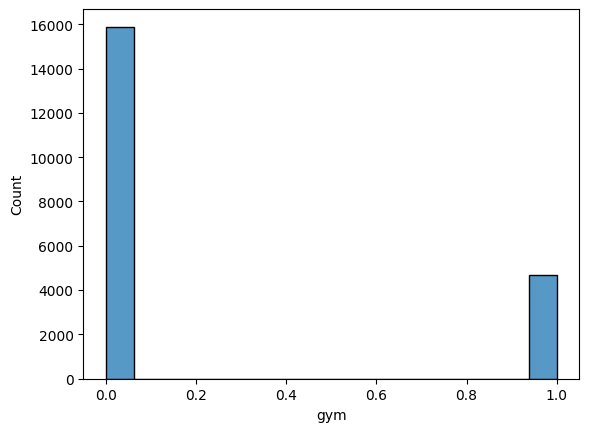

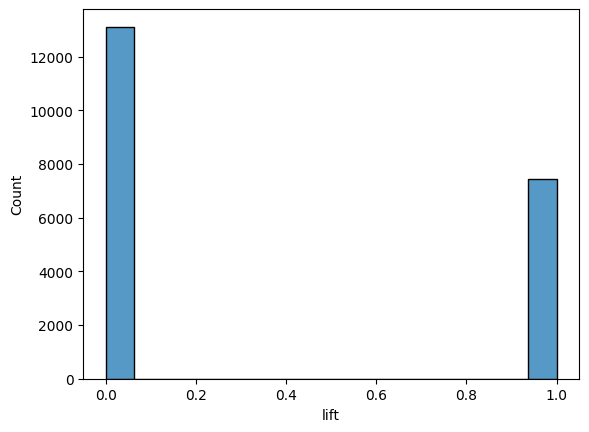

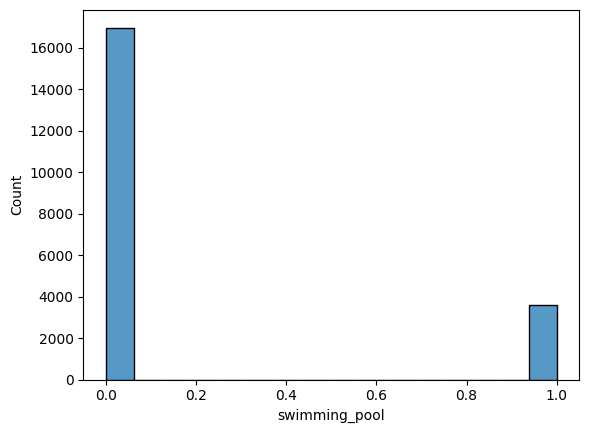

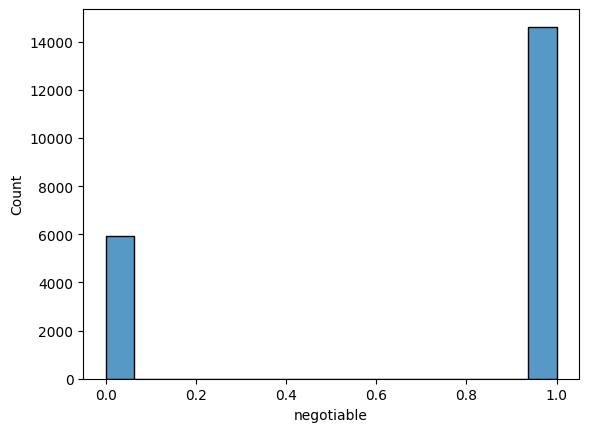

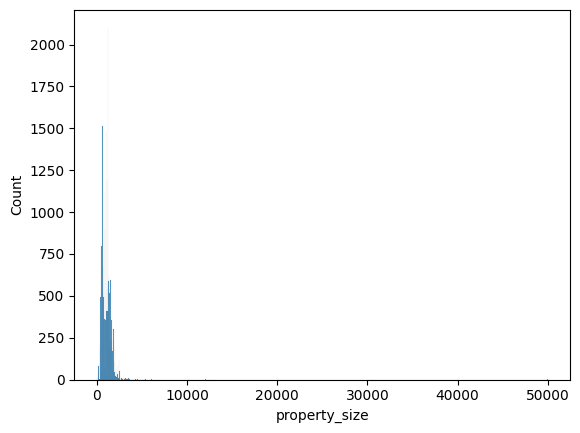

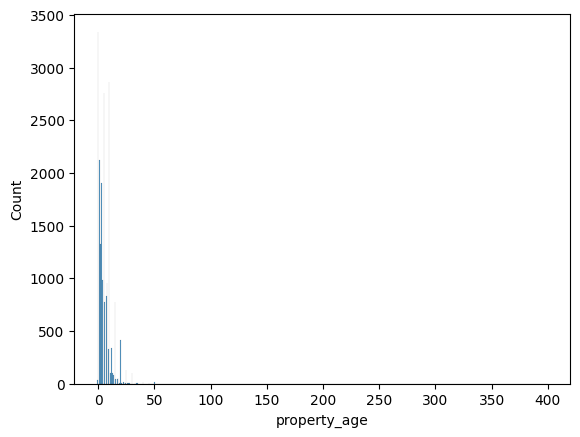

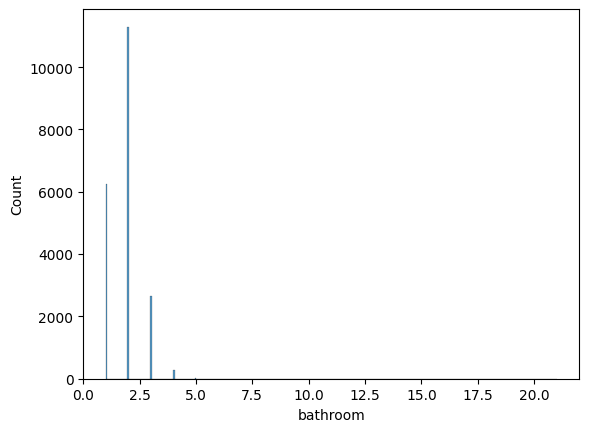

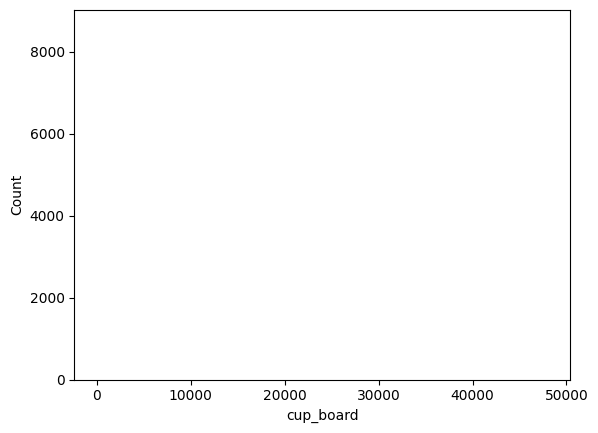

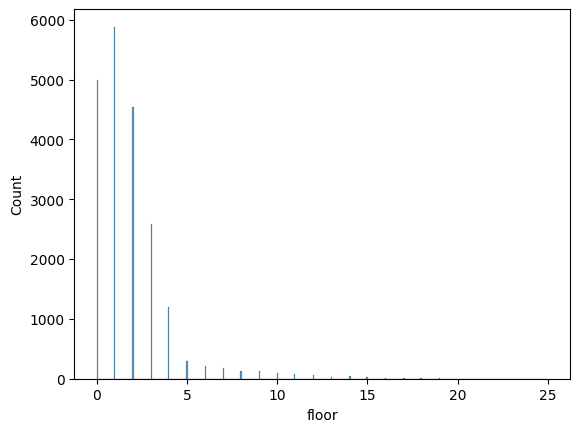

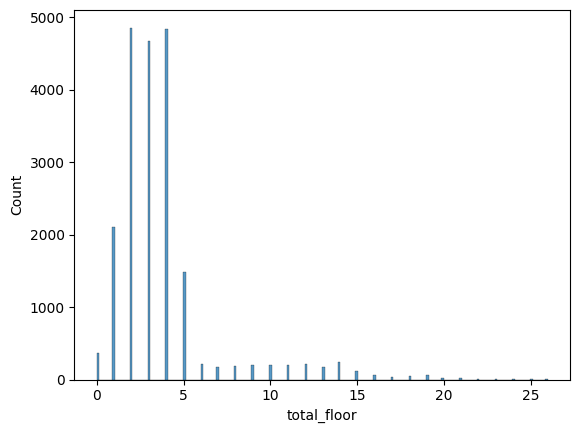

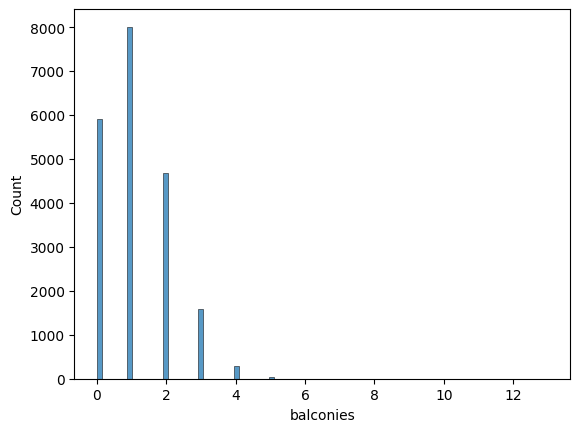

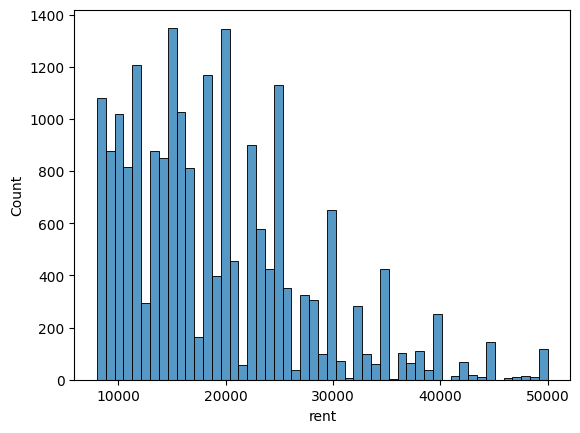

In [ ]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
#warnings is to avoid the red warnings while the output is executed
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

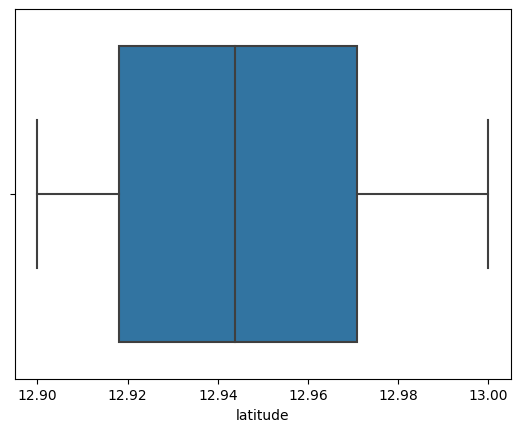

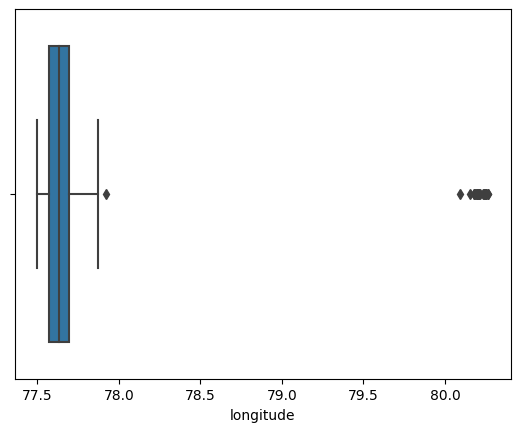

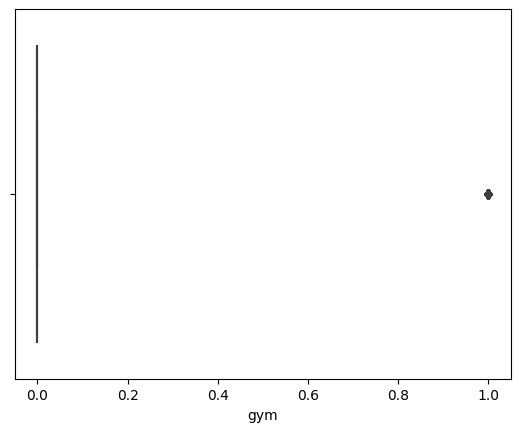

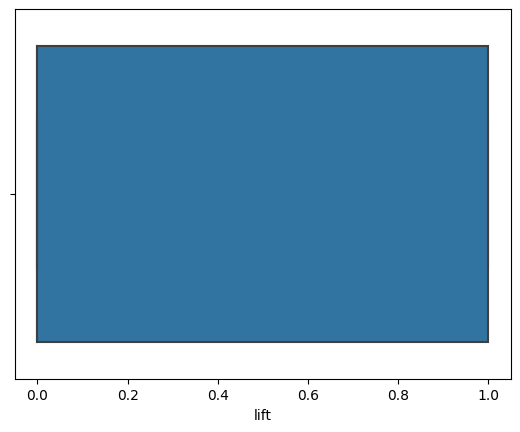

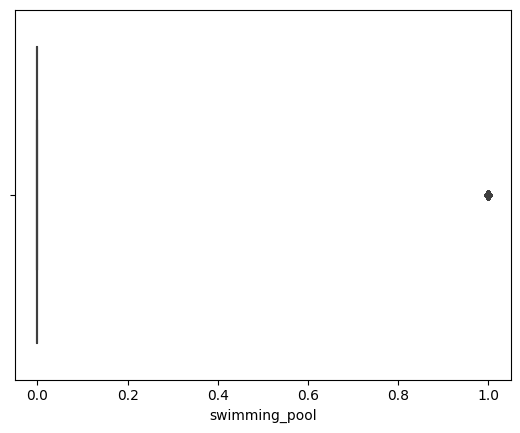

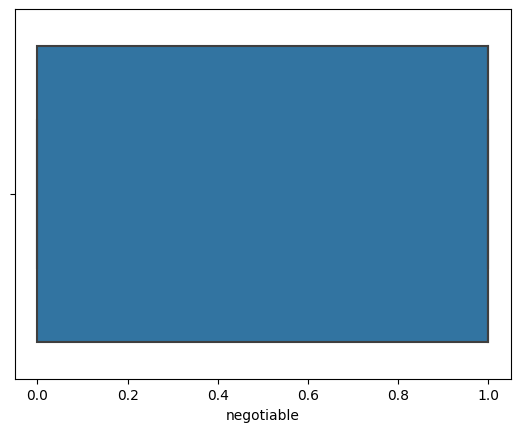

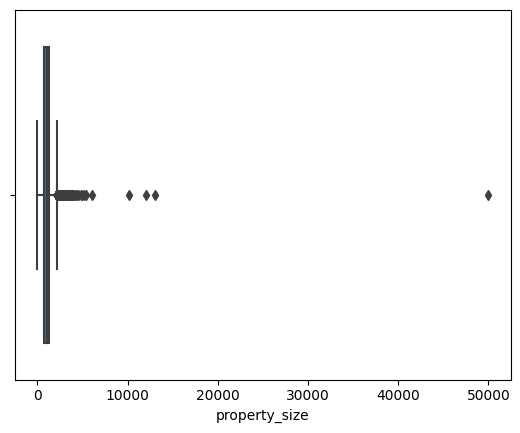

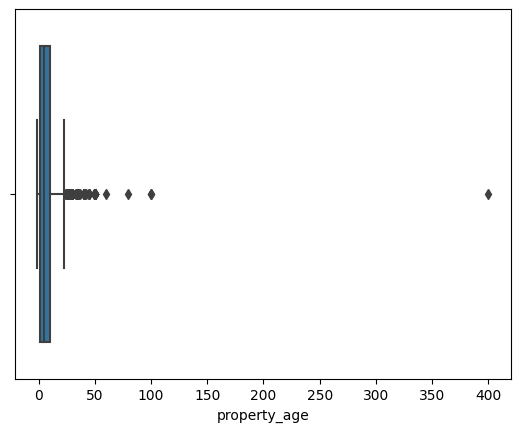

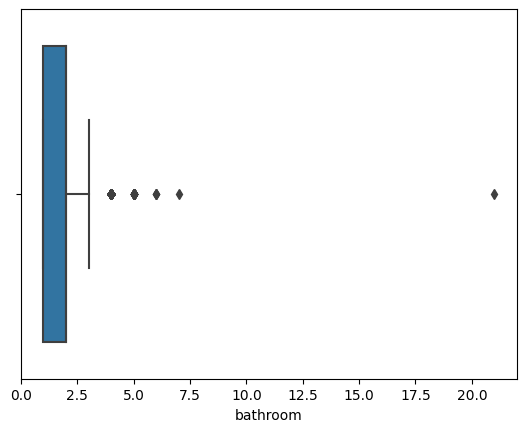

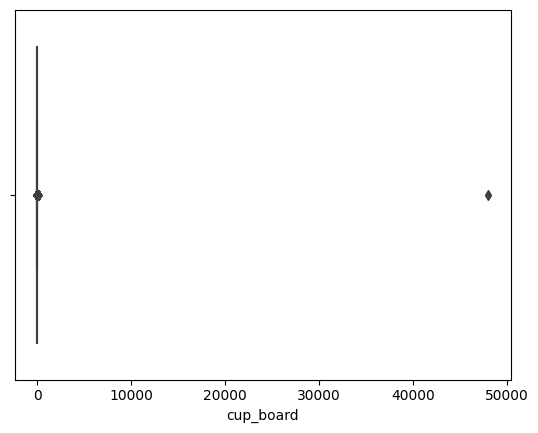

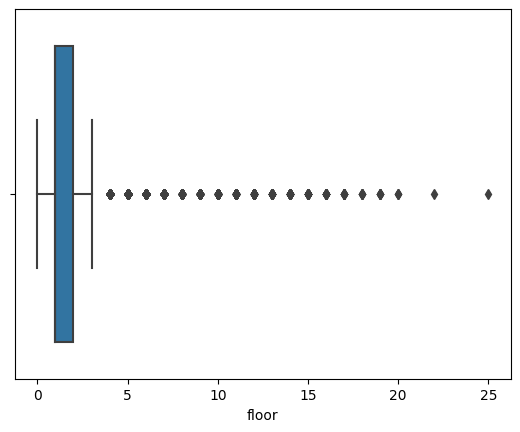

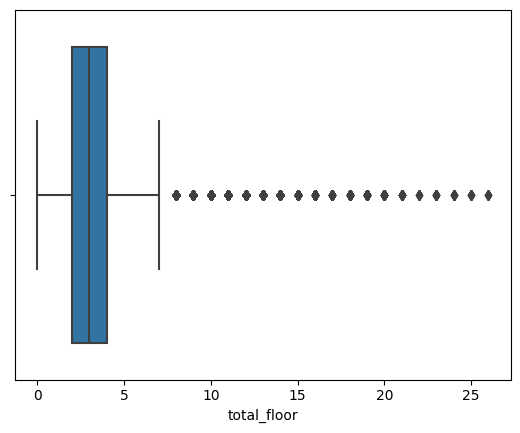

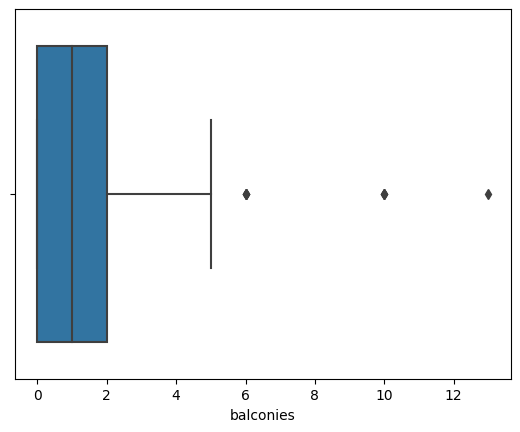

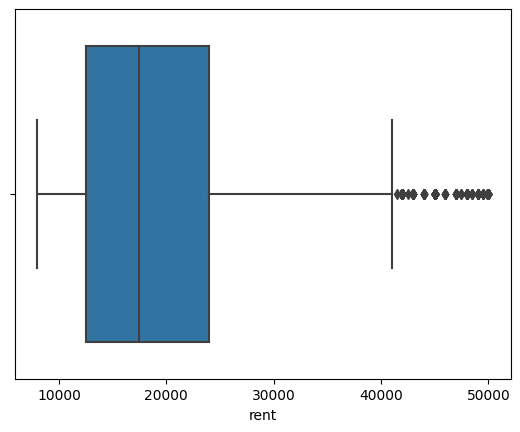

In [ ]:
#Boxplot to understand the distribution to find outlier in the data
import warnings
warnings.filterwarnings("ignore")
#warnings is to avoid the red warnings while the output is executed
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

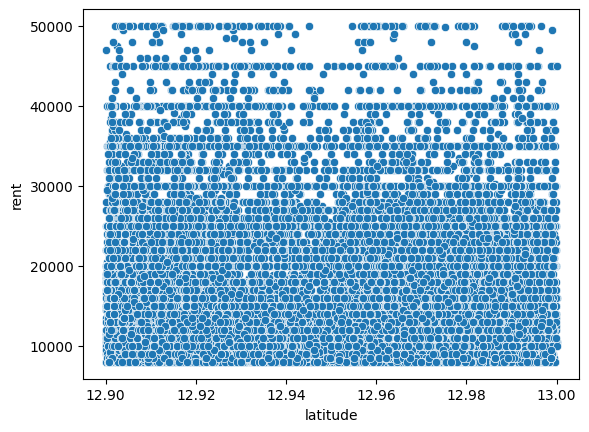

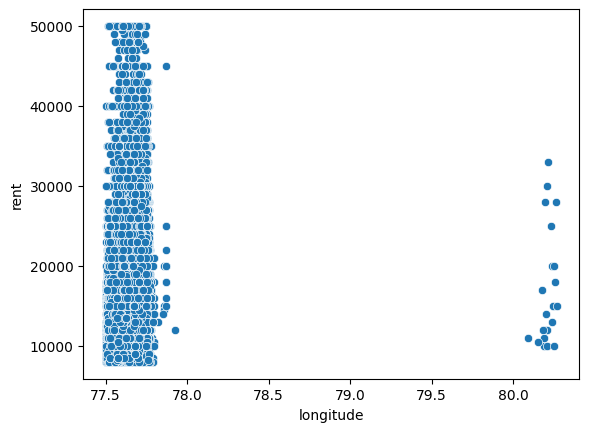

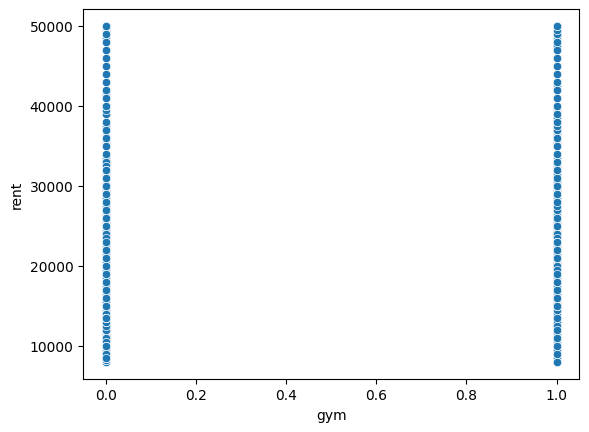

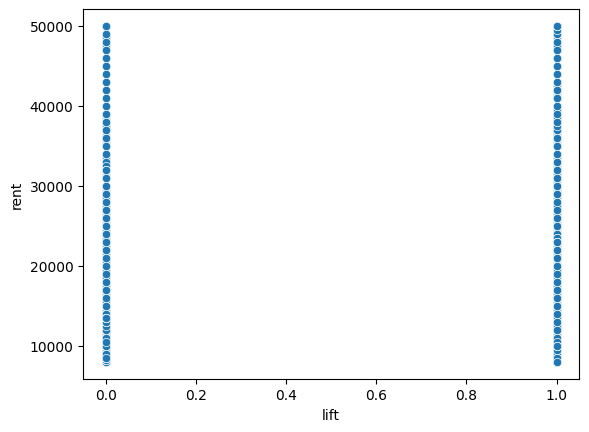

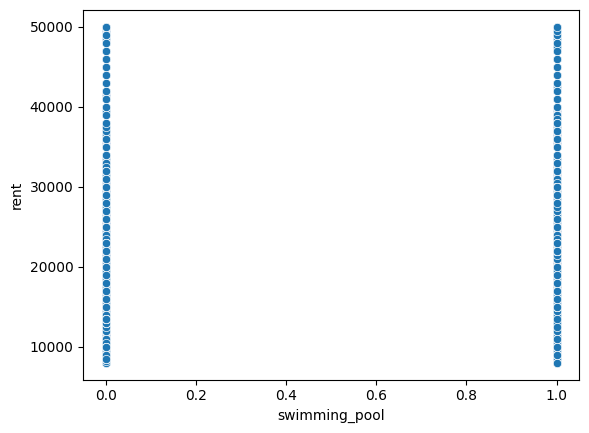

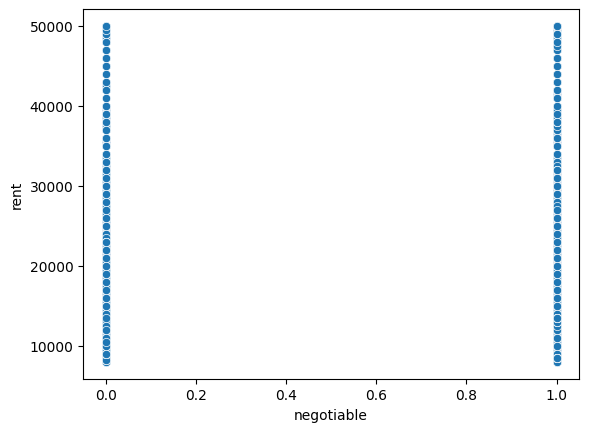

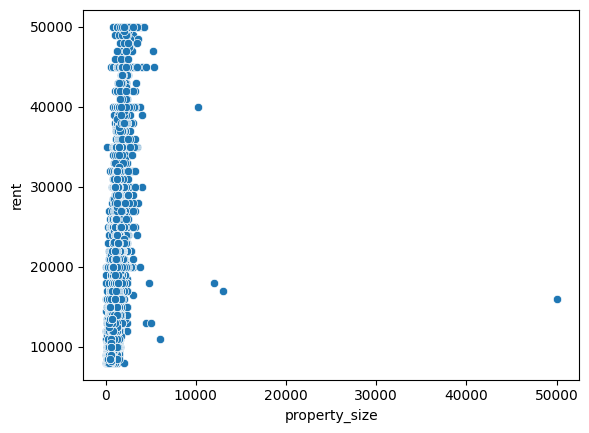

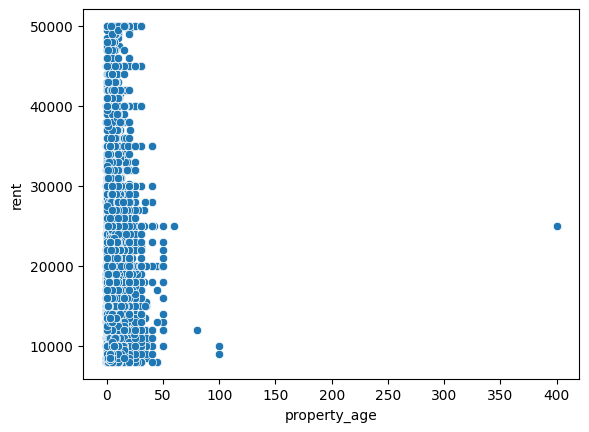

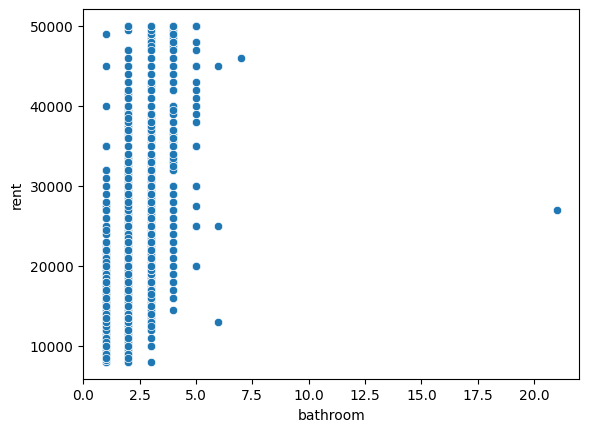

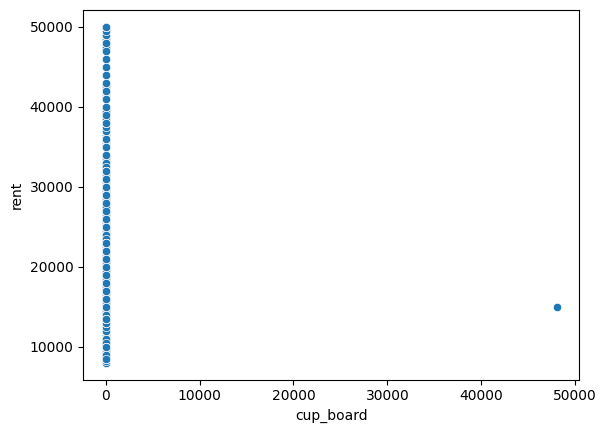

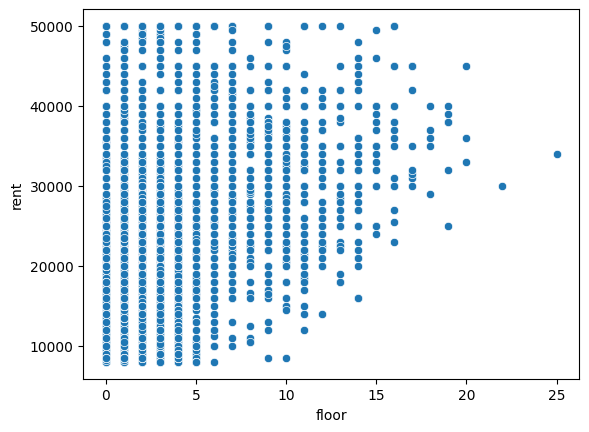

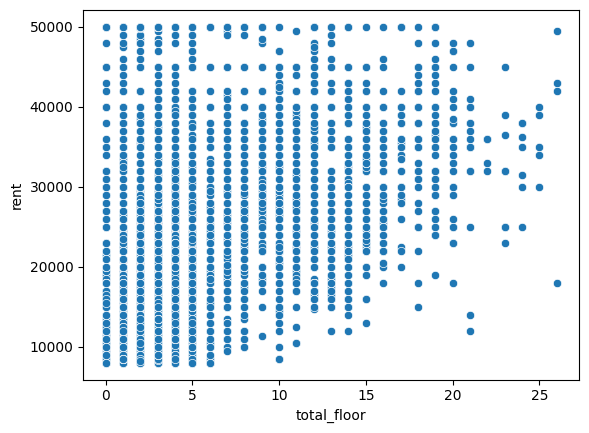

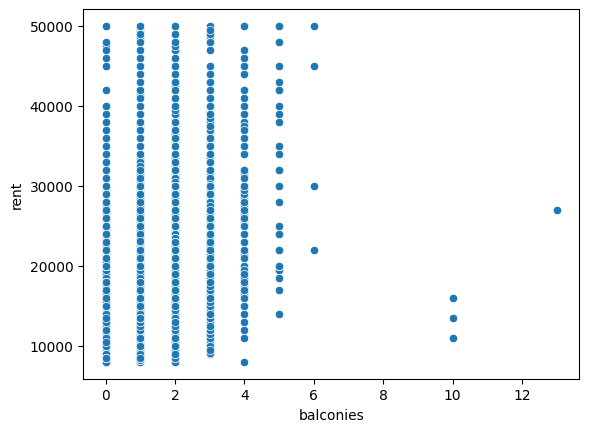

In [ ]:
#scatter plot to understand the relationship
#Other than rent all are independent variable
#i is each element in columns
for i in ['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom', 'cup_board', 'floor','total_floor', 'balconies']:
    sns.scatterplot(data=df,x=i,y='rent')
    plt.show()


In [ ]:
df.select_dtypes(include="number").columns

Index(['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
       'total_floor', 'balconies', 'rent'],
      dtype='object')

In [ ]:
#correlation with heatmap to interpret the relation and multicollinary
#more than 50 (strong correlation) less than 50 (negative correlation)
s=df.select_dtypes(include="number").corr()


<Axes: >

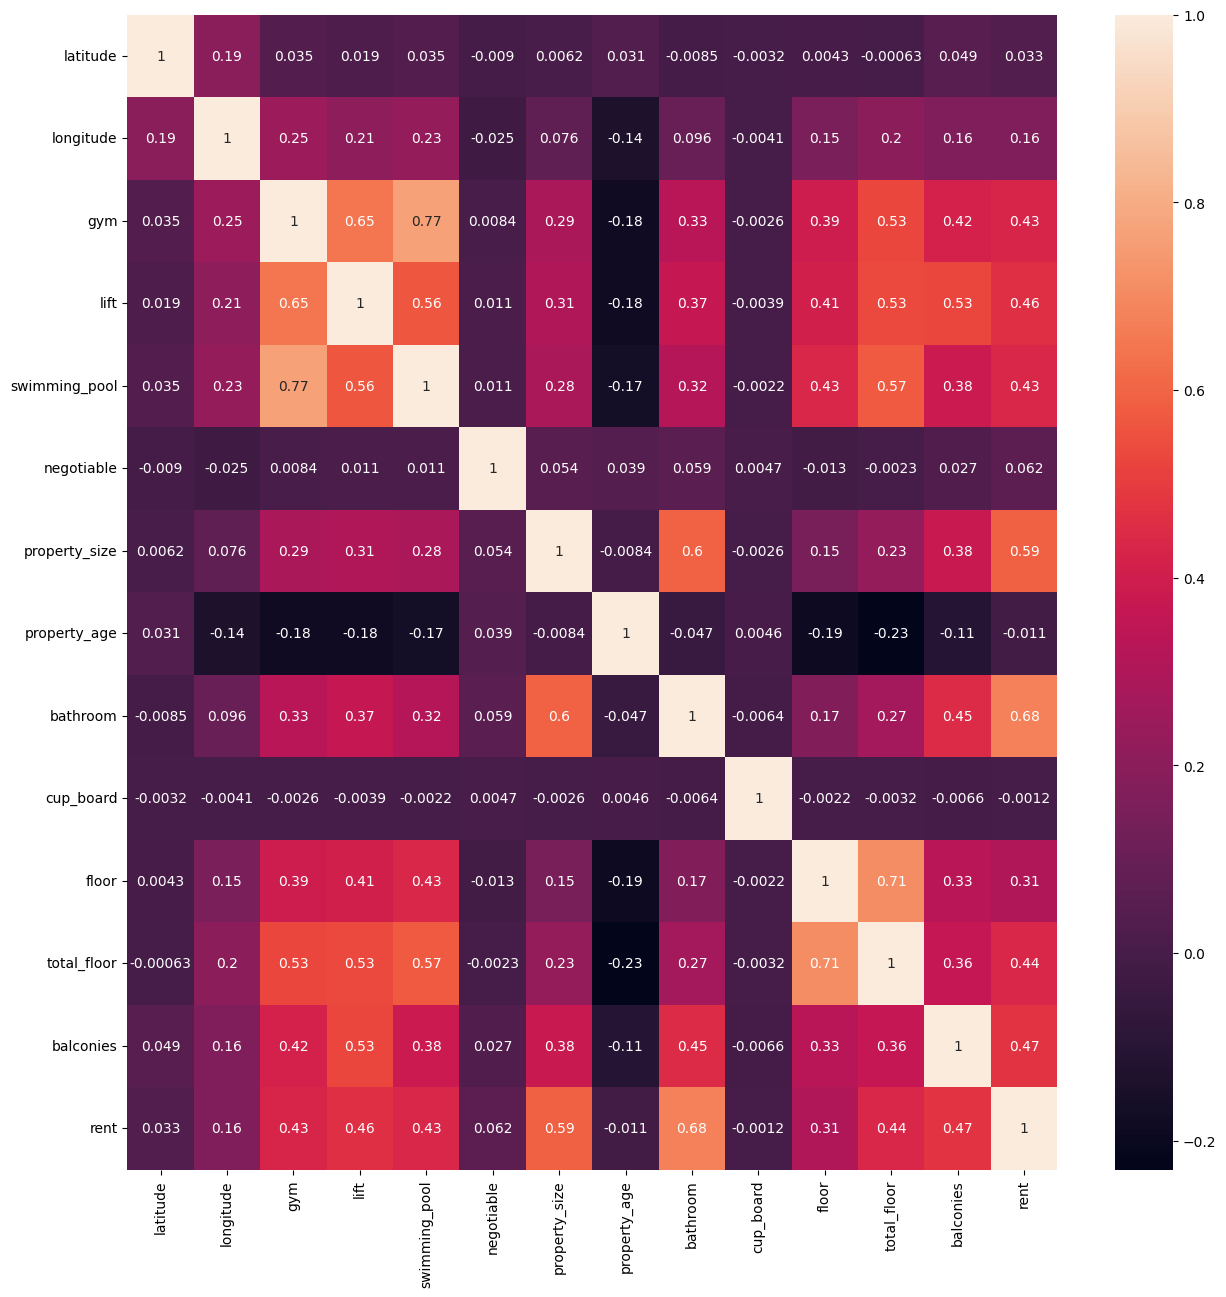

In [ ]:
#annot is for showing the values in the heatmap
#to increase the size of the heatmap plt.figure(figsize=(15,15))
#1.0 - high correlation -.02 - low correlation

plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

# 4.Data Cleaning

In [ ]:
#Missing value treatments

In [ ]:
#Choose the method of imputing missing value
#like mean ,median , mode or KNNImputer to fill the missing values  for numerical columns
#for categorical columns we need to insert with  mode
#continuos data means we need to fill with mean and median
#target varibale oultlier treatment can't be done


In [ ]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [ ]:
#numerical value
for i in ["property_age","bathroom","total_floor"]:
    df[i].fillna(df[i].median(),inplace=True)

In [ ]:
#Categorical value
from sklearn.impute import KNNImputer
impute=KNNImputer()


In [ ]:
#remove categorical variable

for i in df.select_dtypes(include="object").columns:
    mode_value = df[i].mode()[0]
    df[i].fillna(mode_value, inplace=True)

In [ ]:
#Outlier treatments
#Continuos numerical data we do outlier
#we don't do outliers for categorical ,target variables and discrete variables

In [ ]:
def wisker(col):
    #inorder to find the upper wisk and lower wisk we need to ind quartile
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [ ]:
wisker(df['property_age'])

(-12.5, 23.5)

In [ ]:
for i in ['property_age','floor', 'total_floor','balconies']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

In [ ]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

# 5. Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20555 non-null  object 
 2   locality         20555 non-null  object 
 3   activation_date  20555 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20555 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20555 non-null  float64
 15  bathroom         20555 non-null  float64
 16  facing           20555 non-null  object 
 17  cup_board   

In [ ]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,Whitefield,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,7.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,BHK2,Whitefield,2017-04-11 18:11:00,NaN,NaN,FAMILY,1,1,1,...,2.0,E,NaN,NaN,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,NaN,NaN
20551,20,BHK2,Whitefield,2017-04-11 18:11:00,NaN,NaN,FAMILY,0,0,0,...,2.0,E,NaN,NaN,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,NaN,NaN
20552,21,BHK2,Whitefield,2017-04-11 18:11:00,NaN,NaN,FAMILY,1,1,0,...,2.0,E,NaN,NaN,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,NaN,NaN
20553,22,BHK2,Whitefield,2017-04-11 18:11:00,NaN,NaN,FAMILY,0,1,0,...,2.0,E,NaN,NaN,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,NaN,NaN


In [ ]:
df.drop("activation_date", axis=1)

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: remove null valuse

df = df.dropna()


In [ ]:
df_cat=df.select_dtypes(include=['object'])

In [ ]:
df_num=df.select_dtypes(["int64","float64"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    df_cat[col] = df_cat[col].astype(str)
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])


In [ ]:
print(df_cat.dtypes)

id                 int64
type               int64
locality           int64
activation_date    int64
lease_type         int64
furnishing         int64
parking            int64
facing             int64
amenities          int64
water_supply       int64
building_type      int64
dtype: object


In [ ]:
df_cat

,id,type,locality,activation_date,lease_type,furnishing,parking,facing,amenities,water_supply,building_type
0,2668,2,1896,13266,3,2,0,0,4557,2,0
1,8871,2,376,7076,0,2,0,2,1521,1,0
2,18564,3,1687,12985,3,2,0,0,1619,2,0
3,20184,1,228,4786,3,2,3,0,227,1,3
4,17936,3,1058,19315,3,2,0,0,456,1,3
...,...,...,...,...,...,...,...,...,...,...,...
20550,10,9,1896,19566,4,2,0,8,0,3,4
20551,12,2,1896,19566,4,2,0,8,0,3,4
20552,13,2,1896,19566,4,2,0,8,0,3,4
20553,14,2,1896,19566,4,2,0,8,0,3,4


In [ ]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
lease_type         0
furnishing         0
parking            0
facing             0
amenities          0
water_supply       0
building_type      0
latitude           0
longitude          0
gym                0
lift               0
swimming_pool      0
negotiable         0
property_size      0
property_age       0
bathroom           0
cup_board          0
floor              0
total_floor        0
balconies          0
rent               0
dtype: int64

In [ ]:
combined_df = combined_df.dropna()

In [ ]:
combined_df.drop("activation_date", axis=1)

,id,type,locality,lease_type,furnishing,parking,facing,amenities,water_supply,building_type,...,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
0,2668,2,1896,3,2,0,0,4557,2,0,...,1,0,1250,25.0,2.0,2.0,6.0,12.0,2.0,40000.0
1,8871,2,376,0,2,0,2,1521,1,0,...,0,1,1400,4.0,2.0,2.0,3.0,4.0,2.0,22000.0
2,18564,3,1687,3,2,0,0,1619,2,0,...,0,0,1350,6.0,3.0,3.0,1.0,5.0,3.0,28000.0
3,20184,1,228,3,2,3,0,227,1,3,...,0,1,600,3.0,1.0,1.0,1.0,2.0,0.0,8000.0
4,17936,3,1058,3,2,0,0,456,1,3,...,0,1,1500,15.0,3.0,4.0,0.0,0.0,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,4307,9,640,0,2,0,0,3969,0,0,...,1,1,1650,1.0,3.0,3.0,4.0,4.0,2.0,25000.0
20528,8165,2,1080,0,2,0,1,732,1,3,...,0,1,1000,10.0,2.0,2.0,1.0,2.0,2.0,30000.0
20529,11408,2,1117,3,2,0,7,4040,0,0,...,0,1,1000,0.0,2.0,2.0,5.0,5.0,2.0,16000.0
20530,134,2,813,3,2,0,0,2366,2,0,...,0,0,1000,5.0,2.0,2.0,2.0,4.0,3.0,30000.0


In [ ]:
combined_df = pd.concat([df_cat, df_num], axis=1)

In [ ]:
# Import necessary libraries
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume 'df' is your DataFrame

# Feature variables (X)
x = combined_df [['id', 'type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board', 'floor', 'total_floor', 'amenities', 'water_supply', 'building_type', 'balconies']]

# Target variable (y)
y = combined_df ['rent']

# Create and train the linear regression model
model = LinearRegression()
model.fit(x, y)

# Model evaluation
# R2 score
r2_score = model.score(x, y)
print("R2 Score:", r2_score)

# Mean Squared Error
mse = mean_squared_error(y, model.predict(x))
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(y, model.predict(x))
print("Mean Absolute Error:", mae)

# Saving the model
model_filename = 'house_rent_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved as {model_filename}")



R2 Score: 0.6224897452801762
Mean Squared Error: 26852070.724681154
Mean Absolute Error: 3736.6170000124716
Model saved as house_rent_model.pkl


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'x' is your feature matrix
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Example of Ridge regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_scaled, y)


Ridge()